In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import zipfile

url = 'https://dh-abstracts.library.cmu.edu/downloads/dh_conferences_works.csv'
zipped = requests.get(url).content
fp = BytesIO(zipped)
csv = zipfile.ZipFile(fp, "r").open('dh_conferences_works.csv')

In [2]:
data = pd.read_csv(csv)
data.head()

,work_id,conference_label,conference_short_title,conference_theme_title,conference_year,conference_organizers,conference_series,conference_hosting_institutions,conference_city,conference_state,conference_country,conference_url,work_title,work_url,work_authors,work_type,parent_work_id,keywords,languages,topics
0,1,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Writing about It: Documentation and Humanities...,NaN,Julia Flanders,paper,NaN,NaN,English,NaN
1,2,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Integration of Markup Languages and Object-Ori...,NaN,Antonio Navarro;Alfredo Fernandez-Valmayor;Bal...,paper,NaN,NaN,English,NaN
2,3,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,A Workbook Application for Digital Text Analysis,NaN,Worthy N. Martin;Olga Gurevich;Thomas B. Horto...,paper,NaN,NaN,English,NaN
3,4,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,The Middle English Grammar Project,NaN,Jeremy Smith;Simon Horobin,paper,7169.0,NaN,English,NaN
4,5,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Two Historical Linguistic Atlases,NaN,Margaret Laing;Keith Williamson,paper,7169.0,NaN,English,NaN


In [3]:
from collections import Counter
from io import StringIO

In [4]:
data_topics = data.dropna(subset=['topics'])

In [5]:
all_topics = [kw for ll in data_topics.topics[~data_topics.topics.isnull()].apply(
    lambda x: x.replace(' / ', ';').replace(' and ', ';').replace(' & ', ';').split(";")
) for kw in ll]

In [6]:
topic_occurance_des = sorted(Counter(all_topics), reverse = True)

In [7]:
rows = []
for topic, work_id in zip(data_topics.topics, data_topics.work_id):
    x = topic.split(";")
    rows.append([work_id, x])

comma_sep = pd.DataFrame(rows, columns = ['Work_id', 'topics'])

In [8]:
ft = []

for work_id, topic in zip(comma_sep.Work_id, comma_sep.topics):
    for top in topic_occurance_des:
        if top in topic:
            ft.append([work_id, top])
            break

frequent_topics = pd.DataFrame(ft, columns = ['work_id', 'fre_topics'])

In [9]:
print(frequent_topics)

      work_id          fre_topics
0        1579       visualization
1        1580       text analysis
2        1582       text analysis
3        1583       text analysis
4        1584               other
...       ...                 ...
2922    10147    literary studies
2923    10148             english
2924    10149         linguistics
2925    10150  history of science
2926    10151        social media

[2927 rows x 2 columns]


In [10]:
mergeByworkID = pd.merge(data_topics, frequent_topics, on = ['work_id'])

In [11]:
mergeByworkID.head()

,work_id,conference_label,conference_short_title,conference_theme_title,conference_year,conference_organizers,conference_series,conference_hosting_institutions,conference_city,conference_state,...,conference_url,work_title,work_url,work_authors,work_type,parent_work_id,keywords,languages,topics,fre_topics
0,1579,2013 - Nebraska,Nebraska,Freedom to Explore,2013,ADHO,ADHO,University of Nebraska–Lincoln,Lincoln,Nebraska,...,http://dh2013.unl.edu/,A 3D Common Ground: Bringing Humanities Data T...,NaN,James Joel Coltrain,"paper, specified ""short paper""",NaN,3d;architecture;game engine;historical reconst...,English,anthropology;archaeology;art history;games and...,visualization
1,1580,2013 - Nebraska,Nebraska,Freedom to Explore,2013,ADHO,ADHO,University of Nebraska–Lincoln,Lincoln,Nebraska,...,http://dh2013.unl.edu/,4Humanities: Designing Digital Advocacy,NaN,Lindsay Thomas;Alan Liu;Geoffrey Rockwell;Stéf...,"paper, specified ""long paper""",NaN,4humanities;digital humanities;humanities advo...,English,crowdsourcing;digital humanities - institution...,text analysis
2,1582,2013 - Nebraska,Nebraska,Freedom to Explore,2013,ADHO,ADHO,University of Nebraska–Lincoln,Lincoln,Nebraska,...,http://dh2013.unl.edu/,Voyant Notebooks: Literate Programming and Pro...,NaN,Stéfan Sinclair;Geoffrey Rockwell,poster / demo / art installation,NaN,literate computing;text analysis;voyant,English,text analysis,text analysis
3,1583,2013 - Nebraska,Nebraska,Freedom to Explore,2013,ADHO,ADHO,University of Nebraska–Lincoln,Lincoln,Nebraska,...,http://dh2013.unl.edu/,Textal: a text analysis smartphone app for Dig...,NaN,Melissa Terras;Steven James Gray;Rudolf Ammann,poster / demo / art installation,NaN,app;mobile;smartphone;text analysis;wordcloud,English,data mining / text mining;mobile applications ...,text analysis
4,1584,2013 - Nebraska,Nebraska,Freedom to Explore,2013,ADHO,ADHO,University of Nebraska–Lincoln,Lincoln,Nebraska,...,http://dh2013.unl.edu/,Academic Migrants: A Digital Discussion of Tra...,NaN,Olivia Donaldson,"paper, specified ""short paper""",NaN,education;migration;storytelling,English,"audio, video, multimedia;cultural studies;lite...",other


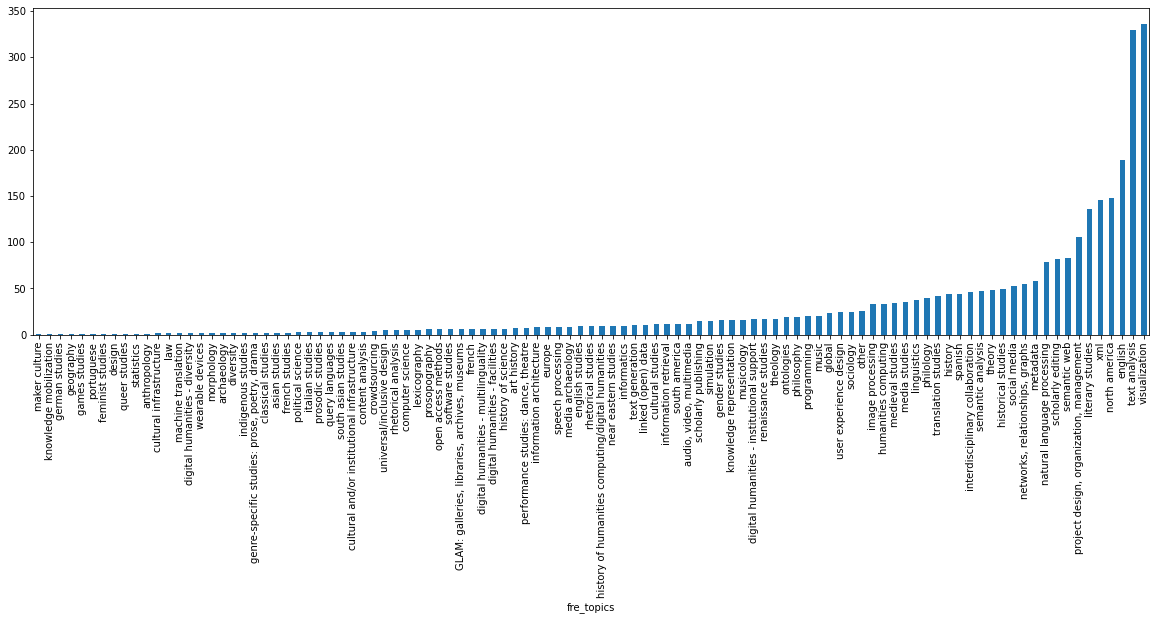

In [15]:

fig = plt.figure(figsize=(20,6))
mergeByworkID.groupby('fre_topics').work_title.count().sort_values().plot.bar(ylim=0)

plt.show()

In [12]:
topics_array = []

for topic, year in zip(data_topics.topics, data_topics.conference_year):
    x = topic.split(";")
    topics_array.append([year, x])

topic_year = pd.DataFrame(rows, columns = ['year', 'topics'])

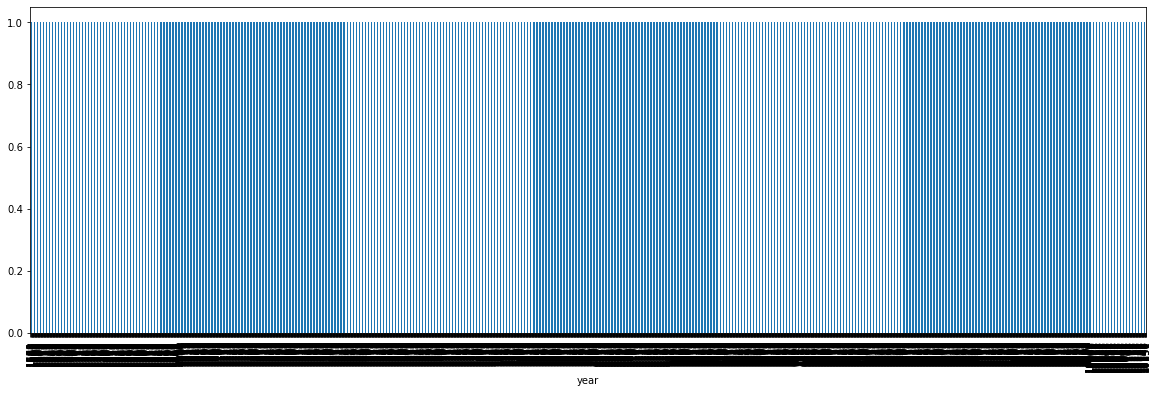

In [13]:
fig = plt.figure(figsize=(20,6))
topic_year.groupby('year').topics.count().plot.bar(ylim=0)
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import warnings

def train(texts, party, num_words=1e5):
    '''
    Eine Funktion, die gegeben Texte und Labels einen Klassifier trainiert
    '''
#     stopwords = [w.strip() for w in open("stopwords.txt").readlines()]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Eine Machine Learning Pipeline um Bag-of-Words Vectors zu erstellen aus Texten
#         text_clf = Pipeline([('vect', TfidfVectorizer(stop_words=stopwords, max_features=int(num_words))),
#                             ('clf', SGDClassifier(loss='log'))])
        text_clf = Pipeline([('vect', TfidfVectorizer(max_features=int(num_words))),
                            ('clf', SGDClassifier(loss='log'))])
        # some hyperparameters
        parameters = {
            'vect__ngram_range': [(1, 1)],
            'clf__alpha': (np.logspace(-5, -1, 5)).tolist()
        }
        # perform gridsearch to get the best regularizer
        clf = GridSearchCV(text_clf, parameters, cv=2, n_jobs=-1,verbose=0)
        clf.fit(texts, party)

    return clf

In [15]:
# Erst nehmen wir einige Daten beiseite, um das Model darauf spaeter testen zu koennen

#replace mergeByworkID frame
train_data, test_data, train_labels, test_labels = train_test_split(mergeByworkID['work_title'], mergeByworkID['fre_topics'], test_size=0.5)

# Jetzt trainieren wir den Klassifier
clf = train(train_data, train_labels)

In [16]:
train_predictions = clf.predict(train_data)
print(classification_report(train_predictions, train_labels))

                                                    precision    recall  f1-score   support

     GLAM: galleries, libraries, archives, museums       0.00      0.00      0.00         0
                                       archaeology       0.00      0.00      0.00         0
                                       art history       0.00      0.00      0.00         0
                          audio, video, multimedia       0.00      0.00      0.00         0
                                 classical studies       0.00      0.00      0.00         0
                                  computer science       0.00      0.00      0.00         0
                                  content analysis       0.00      0.00      0.00         0
                                     crowdsourcing       0.00      0.00      0.00         0
      cultural and/or institutional infrastructure       0.00      0.00      0.00         0
                           cultural infrastructure       0.00      0.00      0.

/Users/kirankiran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
test_predictions = clf.predict(test_data)
print(classification_report(test_predictions, test_labels))

                                                    precision    recall  f1-score   support

     GLAM: galleries, libraries, archives, museums       0.00      0.00      0.00         0
                                      anthropology       0.00      0.00      0.00         0
                                       archaeology       0.00      0.00      0.00         0
                                       art history       0.00      0.00      0.00         0
                                     asian studies       0.00      0.00      0.00         0
                          audio, video, multimedia       0.00      0.00      0.00         0
                                 classical studies       0.00      0.00      0.00         0
                                  computer science       0.00      0.00      0.00         0
                                  content analysis       0.00      0.00      0.00         0
                                     crowdsourcing       0.00      0.00      0.

/Users/kirankiran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(confusion_matrix(test_labels, test_predictions))

[[ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0 91  0]
 [ 0  0  0 ...  0 23  8]]


In [21]:
text = "What Has Digital Curation Got to Do With Digital Humanities?"
clf.predict([text])

array(['english'], dtype='<U50')

In [22]:
text = "A 3D Common Ground: Bringing Humanities Data Together Inside Online Game Engines"
clf.predict([text])

array(['visualization'], dtype='<U50')